# Main Focus of the Notebook: Running Laptrack on detections

### This notebook takes as input the dataframe which contains filtered detected spots and runs laptrack module on it. 
### A new dataframe containing tree id and track id is returned. For us main variable for tracks is track id. 

In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from laptrack import LapTrack, ParallelBackend
import napari
from skimage import io
import time 


Import the dataframe of filtered spots 

In [2]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Data/full_movie_output/cleaned_spots_intensities_c3_all.pkl'
cleaned_spots_df = pd.read_pickle(path)

In [3]:
max_distance = 3
lt = LapTrack(
    track_dist_metric="sqeuclidean",  # The similarity metric for particles. See `scipy.spatial.distance.cdist` for allowed values.
    splitting_dist_metric="sqeuclidean",
    merging_dist_metric="sqeuclidean",
    # the square of the cutoff distance for the "sqeuclidean" metric
    track_cost_cutoff=max_distance**2,
    gap_closing_cost_cutoff = (2*max_distance)**2,
    gap_closing_max_frame_count = 1,
    splitting_cost_cutoff=False,  # or False for non-splitting case
    merging_cost_cutoff=False,  # or False for non-merging case
)

In [4]:

start_time = time.time()

track_df, split_df, merge_df = lt.predict_dataframe(
    cleaned_spots_df,
    coordinate_cols=[
        "mu_x",
        "mu_y",
        "mu_z"
    ],  # the column names for the coordinates
    frame_col="frame",  # the column name for the frame (default "frame")
    only_coordinate_cols=False,  # if False, returned track_df includes columns not in coordinate_cols.
    # False will be the default in the major release.
)

end_time = time.time()

execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")
track_df = track_df.reset_index()

Total execution time: 5888.8570721149445 seconds


In [5]:
c3_tracking_pickle_file = "/Users/apple/Desktop/Akamatsu_Lab/Data/full_movie_output/track_df_c3_cleaned.pkl"

# Save the DataFrame to a pickle file
track_df.to_pickle(c3_tracking_pickle_file)

In [6]:
track_df['track_id'].nunique()

198329

In [7]:
track_appearances = track_df['track_id'].value_counts().reset_index()
track_appearances.columns = ['track_id', 'length']
track_appearances.head()

,track_id,length
0,52852,89
1,89838,78
2,33167,78
3,81356,74
4,74069,66


In [8]:
track_appearances['length'].describe()

count    198329.000000
mean          2.601410
std           3.541177
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          89.000000
Name: length, dtype: float64

In [9]:
track_appearances['length'].value_counts()

length
1     113217
2      32736
3      16072
4       9497
5       6319
       ...  
63         1
64         1
66         1
74         1
89         1
Name: count, Length: 64, dtype: int64

array([[<Axes: title={'center': 'length'}>]], dtype=object)

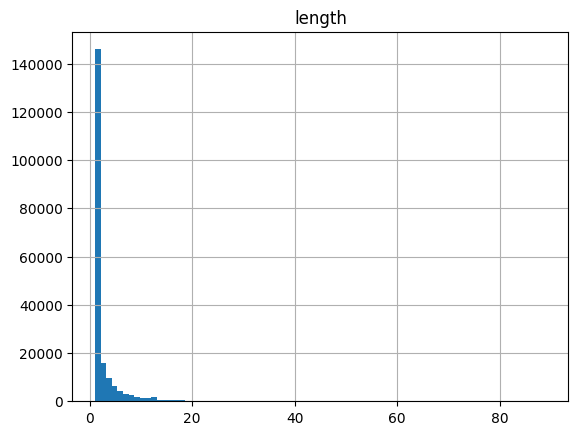

In [12]:
track_appearances.hist(column='length', bins = 80)

In [17]:
filtered_tracks = track_appearances[(track_appearances['length'] >= 4) & (track_appearances['length'] <= 10)]

In [18]:
filtered_tracks

,track_id,length
7169,49651,10
7170,104399,10
7171,92624,10
7172,31963,10
7173,170488,10
...,...,...
36299,3168,4
36300,70146,4
36301,22697,4
36302,3284,4


In [21]:
track_df[track_df['track_id'] == 170488]

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
446674,108,2390,205.000000,242.0,1497.0,74.0,1.0,2.0,3.0,108,170488,170488
450263,109,2454,196.090798,240.0,1497.0,77.0,2.0,1.0,3.0,109,170488,170488
453658,110,2368,190.734454,242.0,1498.0,77.0,3.0,2.0,4.0,110,170488,170488
457036,111,2380,213.512655,241.0,1497.0,77.0,2.0,1.0,4.0,111,170488,170488
460500,112,2390,195.000000,241.0,1497.0,78.0,2.0,2.0,4.0,112,170488,170488
463947,113,2434,195.000000,242.0,1499.0,77.0,2.0,4.0,4.0,113,170488,170488
467273,114,2357,233.791037,241.0,1496.0,76.0,2.0,1.0,3.0,114,170488,170488
470647,115,2332,191.018030,242.0,1497.0,77.0,2.0,2.0,4.0,115,170488,170488
473857,116,2221,212.740048,243.0,1496.0,74.0,2.0,1.0,3.0,116,170488,170488
477186,117,2237,216.543955,243.0,1495.0,76.0,2.0,1.0,4.0,117,170488,170488
